# Importing and Installing Libraries

In [1]:
!pip install eli5
!pip install category_encoders

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import functools

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

import category_encoders as ce

import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


# Loading and Reviewing Data Shape

In [3]:
# Loading up the original dataframe.

berlin = pd.read_csv('https://raw.githubusercontent.com/BuildWeekAirbnbOptimal1/Data-Science/master/Berlin.csv')
print(berlin.shape)
berlin.head()

(22552, 96)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-1

In [4]:
# Checking the names of the columns in this dataframe.

berlin.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

# Preprocessing

## Deciding what columns to keep

In [0]:
# Creating the first df with dropping the columns which I don't think we will need at all.
# Dropped columns are those with mainly high cardinality.
# Keeping that columns which a new renter can normally directly influence.

columns_to_keep = ['id', 'space', 'description', 'host_response_time', 
                   'host_response_rate', 'host_has_profile_pic', 
                   'neighbourhood_group_cleansed', 'latitude', 'longitude', 
                   'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'square_feet', 'price', 
                   'cleaning_fee', 'security_deposit', 'extra_people', 
                   'guests_included', 'minimum_nights', 'maximum_nights', 'instant_bookable', 
                   'is_business_travel_ready', 'cancellation_policy']

berlin_preprocess = berlin[columns_to_keep].set_index('id')

In [6]:
berlin_preprocess.head()

,space,description,host_response_time,host_response_rate,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,square_feet,price,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,maximum_nights,instant_bookable,is_business_travel_ready,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,within an hour,96%,t,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,$30.00,$200.00,$28.00,1,4,1125,f,f,strict_14_with_grace_period
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,NaN,NaN,t,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,$0.00,$0.00,$0.00,1,2,40,f,f,flexible
3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,within a day,100%,t,Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$50.00,$200.00,$20.00,2,62,1125,t,f,strict_14_with_grace_period
3309,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,NaN,NaN,t,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$30.00,$250.00,$18.00,1,5,360,f,f,strict_14_with_grace_period
7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,within an hour,100%,t,Pankow,52.543157,13.415091,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,$42.00,$0.00,$0.00,$24.00,1,2,10,f,f,moderate


In [7]:
print(f'There is is {berlin_preprocess.shape[0]} lines and {berlin_preprocess.shape[1]} columns,'
      f' in this set after dropping irrelevant columns.')

There is is 22552 lines and 26 columns, in this set after dropping irrelevant columns.


## Cleaning the price columns

In [8]:
# Reviewing all the monetary columns from this dataframe.

berlin_preprocess[['price', 'cleaning_fee', 'extra_people', 'security_deposit']].head()

,price,cleaning_fee,extra_people,security_deposit
id,,,,
2015,$60.00,$30.00,$28.00,$200.00
2695,$17.00,$0.00,$0.00,$0.00
3176,$90.00,$50.00,$20.00,$200.00
3309,$26.00,$30.00,$18.00,$250.00
7071,$42.00,$0.00,$24.00,$0.00


In [9]:
# Checking how many missing values we have in each of these features.

print(berlin_preprocess.price.isna().sum())
print(berlin_preprocess.cleaning_fee.isna().sum())
print(berlin_preprocess.extra_people.isna().sum())
print(berlin_preprocess.security_deposit.isna().sum())

0
7146
0
9361


In [0]:
# We are making an assumption that missing values mean that landlords don't charge
# for those particular services. Exchaning missing values with $0.

berlin_preprocess['cleaning_fee'] = berlin_preprocess['cleaning_fee'].fillna('$0.00')
berlin_preprocess['security_deposit'] = berlin_preprocess['security_deposit'].fillna('$0.00')

In [0]:
# Wrangling strings in these features. Dropping $ signs and commas.

berlin_preprocess['price'] = berlin_preprocess['price'].str.replace('$', '').str.replace(',', '').astype(float)
berlin_preprocess['cleaning_fee'] = berlin_preprocess['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)
berlin_preprocess['extra_people'] = berlin_preprocess['extra_people'].str.replace('$', '').str.replace(',', '').astype(float)
berlin_preprocess['security_deposit'] = berlin_preprocess['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)

In [12]:
# Checking the layout of the price distribution.

berlin_preprocess['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

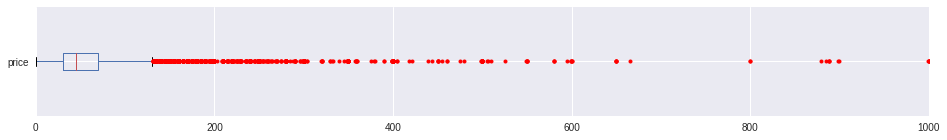

In [13]:
# Graphical presentation of the above listed distribution.

square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
berlin_preprocess['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=square, figsize=(16, 2));

In [0]:
# Finishing initial preprocessing with dropping the values above $400 and equal $0.

berlin = berlin_preprocess.drop(berlin_preprocess[ (berlin_preprocess.price > 400) | (berlin_preprocess.price == 0) ].index, axis=0)

In [15]:
# Checking the shape after initial preprocessing.

berlin.shape

(22441, 26)

## Dealing with missing values

In [16]:
# Listing all the features with missing values.

berlin.isna().sum()

space                            8503
description                       202
host_response_time              12845
host_response_rate              12846
host_has_profile_pic               25
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          32
bedrooms                           18
bed_type                            0
amenities                           0
square_feet                     21996
price                               0
cleaning_fee                        0
security_deposit                    0
extra_people                        0
guests_included                     0
minimum_nights                      0
maximum_nights                      0
instant_bookable                    0
is_business_travel_ready            0
cancellation_policy                 0
dtype: int64

In [0]:
# Dropping the columns with large number of missing values

berlin = berlin.drop(columns=['space', 'host_response_time', 'host_response_rate', 'square_feet'])

In [18]:
# Checking the instances with missing bathroom values.

berlin.loc[berlin['bathrooms'].isna()]

,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,maximum_nights,instant_bookable,is_business_travel_ready,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,,
28711,"Newly renovated, quiet 1-room apartment (appro...",t,Neukölln,52.486106,13.434817,Apartment,Entire home/apt,3,NaN,1.0,Real Bed,{},60.0,30.0,0.0,10.0,2,2,730,f,f,flexible
55298,The couch to sleep on is in the living room. T...,t,Tempelhof - Schöneberg,52.498379,13.341816,Apartment,Shared room,1,NaN,1.0,Couch,{},88.0,10.0,0.0,0.0,1,2,3,f,f,moderate
138955,quiet in the backyard with sunny balcony. slee...,t,Friedrichshain-Kreuzberg,52.490975,13.376910,Apartment,Entire home/apt,4,NaN,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",75.0,40.0,0.0,10.0,2,2,60,f,f,moderate
189596,"Hello there, I am renting a very cosy 1,5 room...",t,Mitte,52.530464,13.398893,Apartment,Entire home/apt,2,NaN,1.0,Futon,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",80.0,0.0,100.0,100.0,2,4,365,f,f,moderate
245991,The 45-square meter apartments are self contai...,t,Reinickendorf,52.584223,13.231135,Apartment,Entire home/apt,2,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",23.0,0.0,650.0,0.0,2,30,365,t,f,strict_14_with_grace_period
246007,The 45-square meter apartments are self contai...,t,Reinickendorf,52.582027,13.230722,Apartment,Entire home/apt,2,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",19.0,0.0,550.0,0.0,2,30,365,t,f,strict_14_with_grace_period
260365,Wonderful old apartment in Schöneberg between ...,t,Tempelhof - Schöneberg,52.499264,13.339909,Apartment,Entire home/apt,2,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Kitchen,""Washer / Drye...",69.0,20.0,300.0,0.0,1,4,90,f,f,flexible
274072,Hi! Check out our beautiful studio apartment i...,t,Pankow,52.549472,13.417323,Apartment,Entire home/apt,2,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",60.0,30.0,0.0,0.0,1,3,365,t,f,strict_14_with_grace_period
302167,DETAILS: -47 m2 / 2 rooms/ max. of 4 persons ...,t,Pankow,52.533860,13.427550,Apartment,Entire home/apt,4,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,""...",66.0,35.0,0.0,15.0,1,3,365,f,f,strict_14_with_grace_period


In [19]:
# And with missing bedroom values.

berlin.loc[berlin['bedrooms'].isna()]

,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,maximum_nights,instant_bookable,is_business_travel_ready,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,,
17904,- beautiful studio apt in downtown Berlin - br...,t,Neukölln,52.495476,13.421821,Apartment,Entire home/apt,2,1.0,NaN,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Buzzer...",49.0,50.0,0.0,15.0,1,5,90,f,f,strict_14_with_grace_period
1757613,Make yourself comfortable in a beautiful moder...,t,Friedrichshain-Kreuzberg,52.513294,13.459891,Apartment,Entire home/apt,2,1.0,NaN,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",60.0,30.0,250.0,10.0,1,1,1125,t,f,strict_14_with_grace_period
2094536,The fine and inviting one-room-apartment is to...,t,Friedrichshain-Kreuzberg,52.513786,13.459694,Apartment,Entire home/apt,2,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Buzzer/wireless i...",65.0,20.0,200.0,0.0,1,3,25,f,f,strict_14_with_grace_period
3429176,This is an apartment which is directly adheren...,t,Mitte,52.509086,13.402309,Apartment,Entire home/apt,2,1.0,NaN,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,E...",65.0,30.0,0.0,15.0,1,1,1125,t,f,flexible
7593011,"This flat is a quiet, spacious and very bright...",t,Tempelhof - Schöneberg,52.465299,13.341703,Apartment,Entire home/apt,2,1.0,NaN,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",40.0,0.0,0.0,0.0,1,14,1125,f,f,flexible
7672145,"The apartment (47m²; kitchen, bathroom, living...",t,Friedrichshain-Kreuzberg,52.521979,13.432972,Apartment,Entire home/apt,2,1.0,NaN,Real Bed,"{Wifi,Kitchen,Washer}",50.0,0.0,100.0,0.0,1,1,1125,t,f,flexible
8919834,Gemütlich und zentral. Direkt im friedrichshai...,t,Friedrichshain-Kreuzberg,52.509925,13.462696,Apartment,Entire home/apt,3,1.0,NaN,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",25.0,0.0,200.0,0.0,1,1,1125,f,f,flexible
12134242,Die Wohung befindet sich in einer ruhigen Seit...,t,Neukölln,52.480177,13.433819,Apartment,Entire home/apt,4,1.0,NaN,Real Bed,"{TV,Wifi,Kitchen,""Buzzer/wireless intercom"",He...",29.0,40.0,800.0,16.0,1,25,1125,f,f,moderate
12196527,An awesome home near Stegliz Business street i...,t,Tempelhof - Schöneberg,52.471997,13.330821,Apartment,Entire home/apt,3,1.0,NaN,Real Bed,"{Kitchen,""Hot tub"",Heating,""Family/kid friendl...",35.0,0.0,0.0,0.0,1,1,1125,t,f,flexible


In [0]:
# It seems that most common value for bathroom is 1 so we are filling that value with nans.
# Using 0 bedrooms for missing bedroom values - most likely studio apartments.

berlin['bathrooms'] = berlin['bathrooms'].fillna(1.0)
berlin['bedrooms'] = berlin['bedrooms'].fillna(0.0)

In [0]:
# Finally filling out NaN on profile pic with f values.

berlin['host_has_profile_pic'] = berlin['host_has_profile_pic'].fillna(value='f')

In [22]:
# Checking our data after this second step of cleaning.

berlin.isna().sum()

description                     202
host_has_profile_pic              0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
bed_type                          0
amenities                         0
price                             0
cleaning_fee                      0
security_deposit                  0
extra_people                      0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
instant_bookable                  0
is_business_travel_ready          0
cancellation_policy               0
dtype: int64

# Baseline and initial model

In [23]:
# Actual baseline mean of the price.

berlin['price'].mean()

57.58437681030257

## Quick and dirty model using only numerical and categorical data

In [0]:
# Splitting our original dataframe into numerical and non numerical components.

berlin_numerical = berlin.select_dtypes(include='number')
berlin_non_numerical = berlin.select_dtypes(exclude='number')

In [25]:
berlin_numerical.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,price,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,maximum_nights
id,,,,,,,,,,,,
2015,52.534537,13.402557,3,1.0,1.0,60.0,30.0,200.0,28.0,1,4,1125
2695,52.548513,13.404553,2,1.0,1.0,17.0,0.0,0.0,0.0,1,2,40
3176,52.534996,13.417579,4,1.0,1.0,90.0,50.0,200.0,20.0,2,62,1125
3309,52.498855,13.349065,2,1.0,1.0,26.0,30.0,250.0,18.0,1,5,360
7071,52.543157,13.415091,2,1.0,1.0,42.0,0.0,0.0,24.0,1,2,10


### Engineering couple of features

In [0]:
# Adding two features using numerical data only.
# One will show what would be an average cost per day at full occupancy.
# Second feature shows what is the minimum expense out of pocket if you decide
# to rent that specific space. 

#berlin_numerical['price_per_person'] = berlin_numerical['price'] / berlin_numerical['accommodates']
#berlin_numerical['minimum_expenditure'] = berlin_numerical['price'] * berlin_numerical['minimum_nights']

### Using these features created big leakeage into the data and produced r^2 scores of 0.98 - 1.

In [27]:
# Making sure that these engineered features are added properly.

berlin_numerical.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,price,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,maximum_nights
id,,,,,,,,,,,,
2015,52.534537,13.402557,3,1.0,1.0,60.0,30.0,200.0,28.0,1,4,1125
2695,52.548513,13.404553,2,1.0,1.0,17.0,0.0,0.0,0.0,1,2,40
3176,52.534996,13.417579,4,1.0,1.0,90.0,50.0,200.0,20.0,2,62,1125
3309,52.498855,13.349065,2,1.0,1.0,26.0,30.0,250.0,18.0,1,5,360
7071,52.543157,13.415091,2,1.0,1.0,42.0,0.0,0.0,24.0,1,2,10


### Running the model on numerical data only

In [0]:
# Splitting the data into train, test groups.

X_train_num, X_test_num = train_test_split(berlin_numerical, train_size=0.8, test_size=0.2, random_state=42)

target = 'price'

y_train_num = X_train_num[target]
X_train_num = X_train_num.drop(columns=target)

y_test_num = X_test_num[target]
X_test_num = X_test_num.drop(columns=target)

In [29]:
# Training the model and getting the initial score.

berlin_num_pipeline = make_pipeline(
    SimpleImputer(),
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

berlin_num_pipeline.fit(X_train_num, y_train_num)

y_pred_num = berlin_num_pipeline.predict(X_test_num)
score_num = r2_score(y_test_num, y_pred_num)
print(f'Model based on numerical data only has a r^2 score of: {round(score_num, 2)}')

Model based on numerical data only has a r^2 score of: 0.57


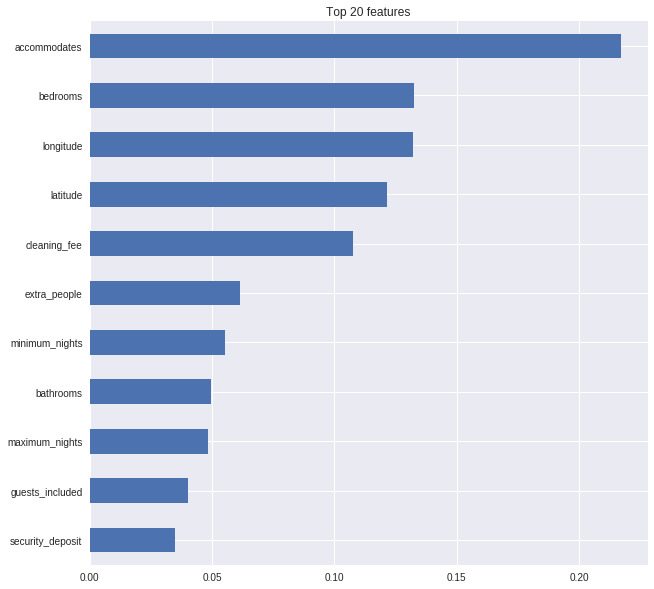

In [30]:
# Get feature importances from the initial numerical model.

rf = berlin_num_pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train_num.columns)

# Plot feature importances.

n = 20
plt.figure(figsize=(10, 10))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

# Based on this data I plan to drop all the data below 0.05 feature importance.
# In this case that would be bathrooms, maxium_nights and security_deposit.

### Running the model on categorical data only

In [31]:
berlin_non_numerical.head()

,description,host_has_profile_pic,neighbourhood_group_cleansed,property_type,room_type,bed_type,amenities,instant_bookable,is_business_travel_ready,cancellation_policy
id,,,,,,,,,,
2015,Great location! 30 of 75 sq meters. This wood...,t,Mitte,Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",f,f,strict_14_with_grace_period
2695,In the summertime we are spending most of our ...,t,Pankow,Apartment,Private room,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",f,f,flexible
3176,This beautiful first floor apartment is situa...,t,Pankow,Apartment,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",t,f,strict_14_with_grace_period
3309,First of all: I prefer short-notice bookings. ...,t,Tempelhof - Schöneberg,Apartment,Private room,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",f,f,strict_14_with_grace_period
7071,Cozy and large room in the beautiful district ...,t,Pankow,Apartment,Private room,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",f,f,moderate


In [0]:
# Dropping these text features as I'm unable to process them under the current deadline.

berlin_non_numerical = berlin_non_numerical.drop(columns=['description', 'amenities'])

In [0]:
# Clean up property_type column

berlin_non_numerical = berlin_non_numerical.replace(['Boutique hotel', 'Hotel',
                                                     'Bungalow', 'Boat', 'Tiny house',
                                                     'Houseboat', 'Camper/RV', 'Villa',
                                                     'Aparthotel', 'Pension (South Korea)',
                                                     'Cabin', 'Cottage', 'Resort',
                                                     'Train', 'Casa particular (Cuba)',
                                                     'Castle', 'Island', 'In-law', 'Chalet',
                                                     'Tipi', 'Cave', 'Barn'], 'Other')

In [0]:
# Clean up bed_type column

berlin_non_numerical = berlin_non_numerical.replace(['Pull-out Sofa', 'Futon', 'Couch', 'Airbed'], 'Sofa\Other')

In [0]:
# Clean up cancellation_policy column

berlin_non_numerical = berlin_non_numerical.replace(['strict_14_with_grace_period', 'super_strict_30', 'super_strict_60'], 'strict')


In [36]:
# Checking the cleaned non numerical dataframe.

berlin_non_numerical.head()

,host_has_profile_pic,neighbourhood_group_cleansed,property_type,room_type,bed_type,instant_bookable,is_business_travel_ready,cancellation_policy
id,,,,,,,,
2015,t,Mitte,Guesthouse,Entire home/apt,Real Bed,f,f,strict
2695,t,Pankow,Apartment,Private room,Real Bed,f,f,flexible
3176,t,Pankow,Apartment,Entire home/apt,Real Bed,t,f,strict
3309,t,Tempelhof - Schöneberg,Apartment,Private room,Sofa\Other,f,f,strict
7071,t,Pankow,Apartment,Private room,Real Bed,f,f,moderate


In [37]:
# Encoding the categorical values. 

encoder = ce.OneHotEncoder(use_cat_names=True)

encoded = encoder.fit_transform(berlin_non_numerical)
print(f'{len(encoded.columns)} columns')
encoded.head()

36 columns


,host_has_profile_pic_t,host_has_profile_pic_f,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Charlottenburg-Wilm.,neighbourhood_group_cleansed_Treptow - Köpenick,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Marzahn - Hellersdorf,neighbourhood_group_cleansed_Spandau,property_type_Guesthouse,property_type_Apartment,property_type_Condominium,property_type_Loft,property_type_House,property_type_Serviced apartment,property_type_Townhouse,property_type_Other,property_type_Bed and breakfast,property_type_Guest suite,property_type_Hostel,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Real Bed,bed_type_Sofa\Other,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_strict,cancellation_policy_flexible,cancellation_policy_moderate
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
2695,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3176,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0
3309,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0
7071,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1


In [0]:
# Splitting the data into train, test groups.

X_train_encoded, X_test_encoded = train_test_split(encoded, train_size=0.8, test_size=0.2, random_state=42)

y_train_encoded = y_train_num
y_test_encoded = y_test_num

In [39]:
# Training the model and getting the initial score.

encoded_pipeline = make_pipeline(
    SimpleImputer(),
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

encoded_pipeline.fit(X_train_encoded, y_train_encoded)

y_pred_encoded = encoded_pipeline.predict(X_test_encoded)
score_encoded = r2_score(y_test_encoded, y_pred_encoded)
print(f'Encoded model based on categorical data has r^2 score: {round(score_encoded, 2)}')

Encoded model based on categorical data has r^2 score: 0.28


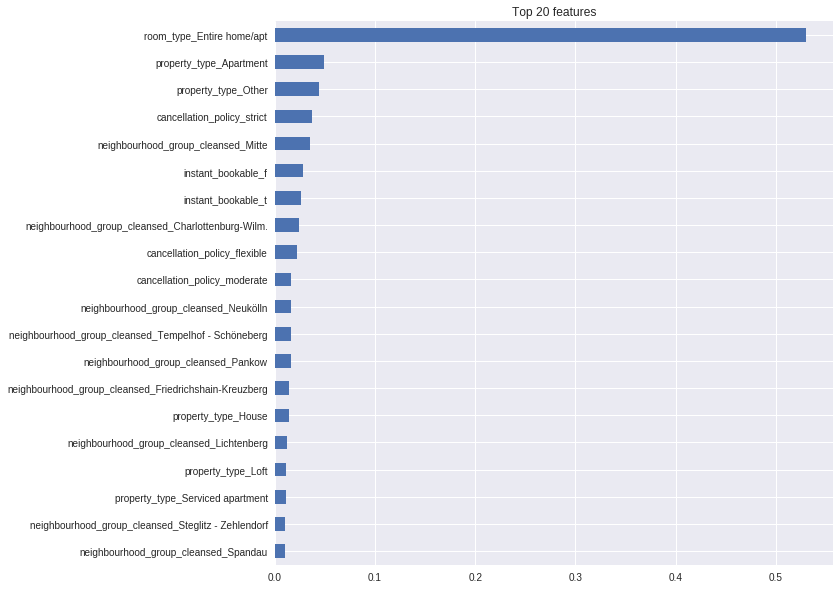

In [40]:
# Get feature importances for categorical data.

rf = encoded_pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train_encoded.columns)

# Plot feature importances.

n = 20
plt.figure(figsize=(10, 10))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

# It seems that these are very fragmented. From the top 20 we will keep
# property_type, cancellation_policy and instant_bookable. 
# Neighbourhoud will be dropped since we are keeping the coordinates from the numerical set.

### Dropping the less important features and merging the final dataframe

In [0]:
# Dropping the unimoportant columns.

berlin_numerical = berlin_numerical.drop(columns=['bathrooms', 'maximum_nights', 'security_deposit'])
berlin_non_numerical = berlin_non_numerical.drop(columns=['neighbourhood_group_cleansed'])

In [42]:
# Encoding the categorical values. 

encoder = ce.OneHotEncoder(use_cat_names=True)

encoded = encoder.fit_transform(berlin_non_numerical)
print(f'{len(encoded.columns)} columns')
encoded.head()

24 columns


,host_has_profile_pic_t,host_has_profile_pic_f,property_type_Guesthouse,property_type_Apartment,property_type_Condominium,property_type_Loft,property_type_House,property_type_Serviced apartment,property_type_Townhouse,property_type_Other,property_type_Bed and breakfast,property_type_Guest suite,property_type_Hostel,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Real Bed,bed_type_Sofa\Other,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_strict,cancellation_policy_flexible,cancellation_policy_moderate
id,,,,,,,,,,,,,,,,,,,,,,,,
2015,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
2695,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3176,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0
3309,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0
7071,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1


In [0]:
# Creating the final dataframe.

berlin_final = pd.merge(berlin_numerical, encoded, left_index=True, right_index=True)

# Final model

In [44]:
berlin_final.head()

,latitude,longitude,accommodates,bedrooms,price,cleaning_fee,extra_people,guests_included,minimum_nights,host_has_profile_pic_t,host_has_profile_pic_f,property_type_Guesthouse,property_type_Apartment,property_type_Condominium,property_type_Loft,property_type_House,property_type_Serviced apartment,property_type_Townhouse,property_type_Other,property_type_Bed and breakfast,property_type_Guest suite,property_type_Hostel,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Real Bed,bed_type_Sofa\Other,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_strict,cancellation_policy_flexible,cancellation_policy_moderate
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,52.534537,13.402557,3,1.0,60.0,30.0,28.0,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
2695,52.548513,13.404553,2,1.0,17.0,0.0,0.0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3176,52.534996,13.417579,4,1.0,90.0,50.0,20.0,2,62,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0
3309,52.498855,13.349065,2,1.0,26.0,30.0,18.0,1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0
7071,52.543157,13.415091,2,1.0,42.0,0.0,24.0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1


In [0]:
X_train_final, X_test_final = train_test_split(berlin_final, train_size=0.8, test_size=0.2, random_state=42)

In [0]:
target_final = 'price'

y_train_final = X_train_final[target_final]
X_train_final = X_train_final.drop(columns=target_final)

y_test_final = X_test_final[target_final]
X_test_final = X_test_final.drop(columns=target_final)

In [47]:
berlin_pipeline_final = make_pipeline(
    SimpleImputer(),
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

berlin_pipeline_final.fit(X_train_final, y_train_final)

y_pred_final = berlin_pipeline_final.predict(X_test_final)
score_final = r2_score(y_test_final, y_pred_final)
print(f'Final model r^2 score: {round(score_final, 2)}')

Final model r^2 score: 0.6


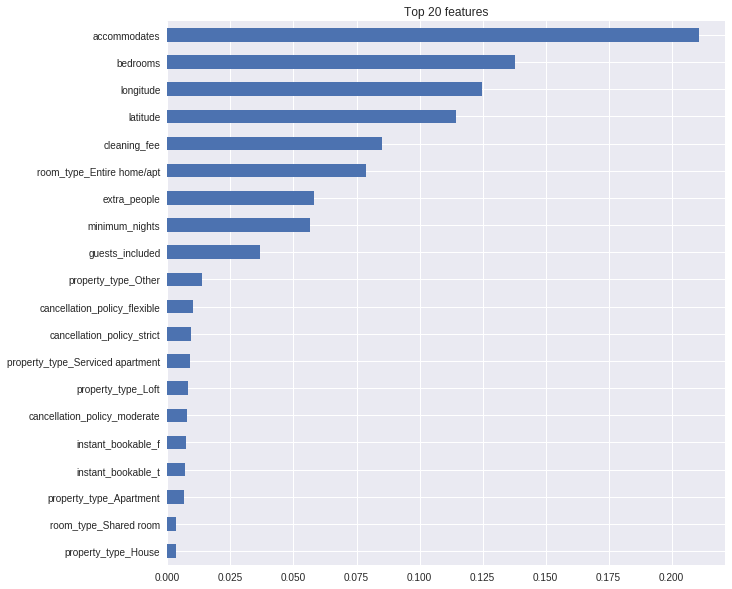

In [48]:
# Get feature importances

rf = berlin_pipeline_final.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train_final.columns)

# Plot feature importances

n = 20
plt.figure(figsize=(10, 10))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();